**Anggota Kelompok 4:**

1. Akmal Muzakki Bakir (1305210087)
2. Namira Salsabilla (1305210091)

## Imported Libraries

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

## Data Preparation and Preprocessing

In [ ]:
df = pd.read_csv('kpop.csv')
df.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url,image_url,location
0,Wed Dec 06 02:03:21 +0000 2023,1732219143850508649,#BTS: life goes on https://t.co/IOVPevXFpU,98,13,1811,5014,en,1255989711421747202,1732219143850508649,agustpics,https://twitter.com/agustpics/status/173221914...,https://pbs.twimg.com/ext_tw_video_thumb/17322...,credits if repost
1,Thu Nov 30 14:56:27 +0000 2023,1730239374812426528,WHO MADE THIS EDIT😭😂😂😂 #JinJikook #JIMIN #JIN...,4,4,89,338,en,1685621711780347904,1730239374812426528,fujing2397,https://twitter.com/fujing2397/status/17302393...,https://pbs.twimg.com/ext_tw_video_thumb/17302...,Magic shop💜
2,Tue Dec 05 16:34:03 +0000 2023,1732075873883267457,Why isn't anyone talking about what 🐻 said? Bo...,8,2,37,362,en,1502371684610977792,1732075873883267457,reekhh,https://twitter.com/reekhh/status/173207587388...,https://pbs.twimg.com/ext_tw_video_thumb/17320...,Seoul
3,Tue Dec 05 17:21:12 +0000 2023,1732087738436874501,*Namjoon spills some tea kk 🐰: you can’t talk ...,6,1,28,199,en,1502371684610977792,1732087738436874501,reekhh,https://twitter.com/reekhh/status/173208773843...,https://pbs.twimg.com/ext_tw_video_thumb/17320...,Seoul
4,Wed Dec 06 10:01:06 +0000 2023,1732339373809467495,#Jungkook officially becomes the longest-chart...,1,5,69,134,en,1640913701808078851,1732339373809467495,TheePopCore,https://twitter.com/TheePopCore/status/1732339...,https://pbs.twimg.com/media/GAqA8ekW4AAVksk.jpg,NaN


In [ ]:
# Get the time when the data was scrapped
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%Y-%m-%d')
print(df['created_at'].min())
print(df['created_at'].max())

2023-11-27
2023-12-06


In [ ]:
df['total_interaction'] = df['retweet_count'] + df['favorite_count']
df = df[['full_text', 'username', 'total_interaction']].sort_values(by='total_interaction', ascending=False)
df.head()

,full_text,username,total_interaction
276,#ENHYPEN #JAKE Thank you ENGENE!!!❤️❤️❤️ http...,ENHYPEN_members,196607
268,#ENHYPEN #JAKE TITLE: left right left cent...,ENHYPEN_members,139521
731,❣️Happy CHANYEOL Day❣️ #찬열 #CHANYEOL #엑소 #EXO...,weareoneEXO,119795
149,[#2023MAMA] Worldwide Fans' Choice &amp; SAMSU...,MnetMAMA,89131
1758,HAPPY BIRTHDAY DOYOUNG 🎉 ✅2023.12.04 #TREASUR...,ygent_official,83220


In [ ]:
# Retrieves the prefixes of words containing @ on each row in the full_text column
df['mention'] = df['full_text'].str.findall(r'@.*?(?=\s|$)')
df.head()

,full_text,username,total_interaction,mention
276,#ENHYPEN #JAKE Thank you ENGENE!!!❤️❤️❤️ http...,ENHYPEN_members,196607,[]
268,#ENHYPEN #JAKE TITLE: left right left cent...,ENHYPEN_members,139521,[]
731,❣️Happy CHANYEOL Day❣️ #찬열 #CHANYEOL #엑소 #EXO...,weareoneEXO,119795,[]
149,[#2023MAMA] Worldwide Fans' Choice &amp; SAMSU...,MnetMAMA,89131,[@bts_bighit]
1758,HAPPY BIRTHDAY DOYOUNG 🎉 ✅2023.12.04 #TREASUR...,ygent_official,83220,[]


In [ ]:
df.drop(['full_text'], inplace=True, axis=1)
df.head()

,username,total_interaction,mention
276,ENHYPEN_members,196607,[]
268,ENHYPEN_members,139521,[]
731,weareoneEXO,119795,[]
149,MnetMAMA,89131,[@bts_bighit]
1758,ygent_official,83220,[]


In [ ]:
# Explode mention column
df = df.explode('mention')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2466 entries, 276 to 1526
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           2466 non-null   object
 1   total_interaction  2466 non-null   int64 
 2   mention            1134 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.1+ KB


In [ ]:
# Lower case all word in mention column
df['mention'] = df['mention'].str.lower()
df.head()

,username,total_interaction,mention
276,ENHYPEN_members,196607,NaN
268,ENHYPEN_members,139521,NaN
731,weareoneEXO,119795,NaN
149,MnetMAMA,89131,@bts_bighit
1758,ygent_official,83220,NaN


In [ ]:
# Delete @ on every word in mention column
df['mention'] = df['mention'].str.replace('@', '')
df.head()

,username,total_interaction,mention
276,ENHYPEN_members,196607,NaN
268,ENHYPEN_members,139521,NaN
731,weareoneEXO,119795,NaN
149,MnetMAMA,89131,bts_bighit
1758,ygent_official,83220,NaN


In [ ]:
df.dropna(inplace=True)
df = df[df['mention'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 149 to 1097
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           1108 non-null   object
 1   total_interaction  1108 non-null   int64 
 2   mention            1108 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.6+ KB


In [ ]:
df.head()

,username,total_interaction,mention
149,MnetMAMA,89131,bts_bighit
87,MnetMAMA,55346,bts_bighit
122,MnetMAMA,51942,bts_bighit
2027,MnetMAMA,51093,ygtreasuremaker
114,MnetMAMA,49106,bts_bighit


In [ ]:
# Drop total interaction
df.drop(['total_interaction'], inplace=True, axis=1)
df.drop_duplicates(inplace=True)
df.head()

,username,mention
149,MnetMAMA,bts_bighit
2027,MnetMAMA,ygtreasuremaker
384,enhypenweverse,enhypen_members
384,enhypenweverse,enhypen
297,GoldenDisc_en,enhypen


In [ ]:
# Drop column when username = mention
df = df[df['username'] != df['mention']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 149 to 1097
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   username  483 non-null    object
 1   mention   483 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


## Community Detection

In [ ]:
G = nx.from_pandas_edgelist(df, source='username', target='mention', create_using=nx.Graph())
print(str(G))

Graph with 493 nodes and 482 edges


### Initial Graph

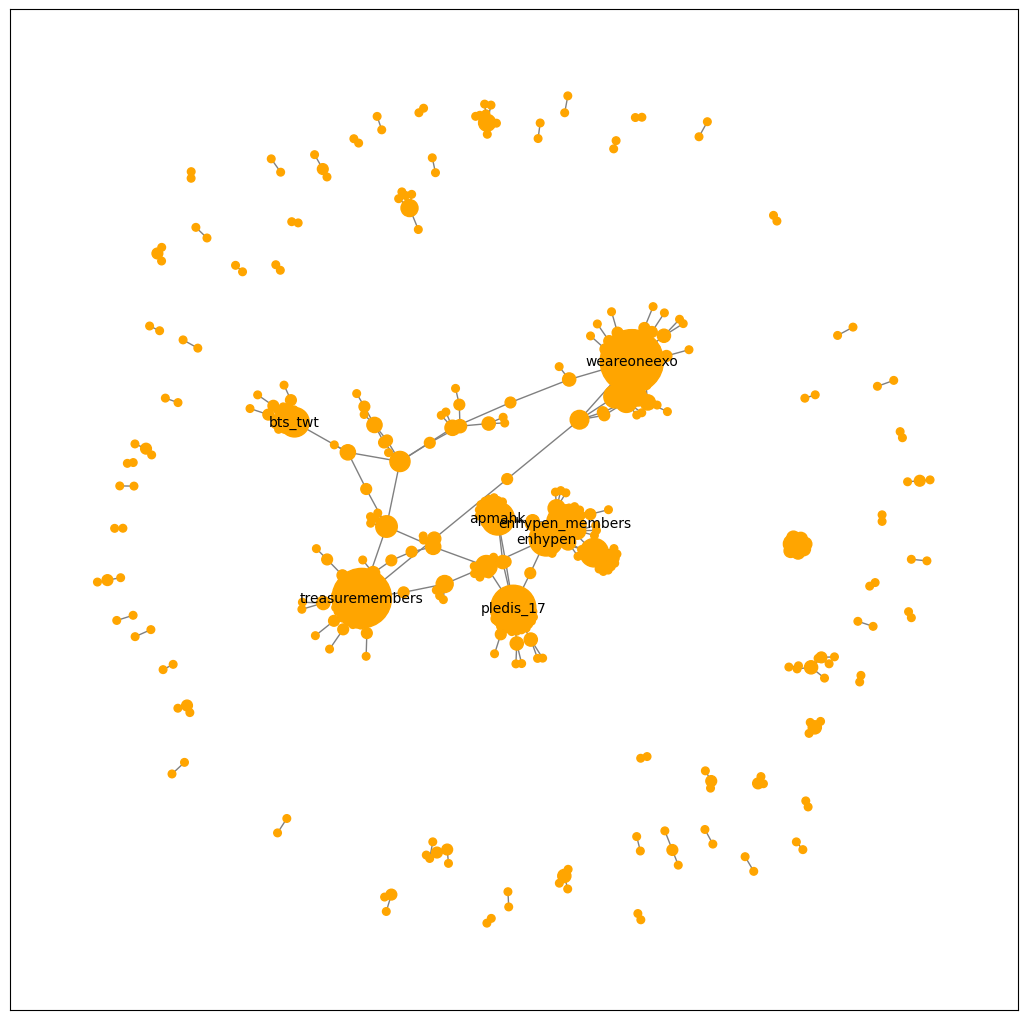

In [ ]:
def initial_graph(G):
    degree = dict(G.degree())
    top_nodes = sorted(degree, key=degree.get, reverse=True)[:7]

    plt.figure(figsize=(13, 13))
    nx.draw_networkx(
        G,
        with_labels=True,
        labels={node: node if node in top_nodes else "" for node in G.nodes()},
        node_color='orange',
        edge_color='grey',
        linewidths=1,
        font_size=10,
        node_size=[v * 30 for v in dict(G.degree()).values()],
        pos=nx.fruchterman_reingold_layout(G)
    )
    plt.show()

initial_graph(G)

### Filtered Connected Graph

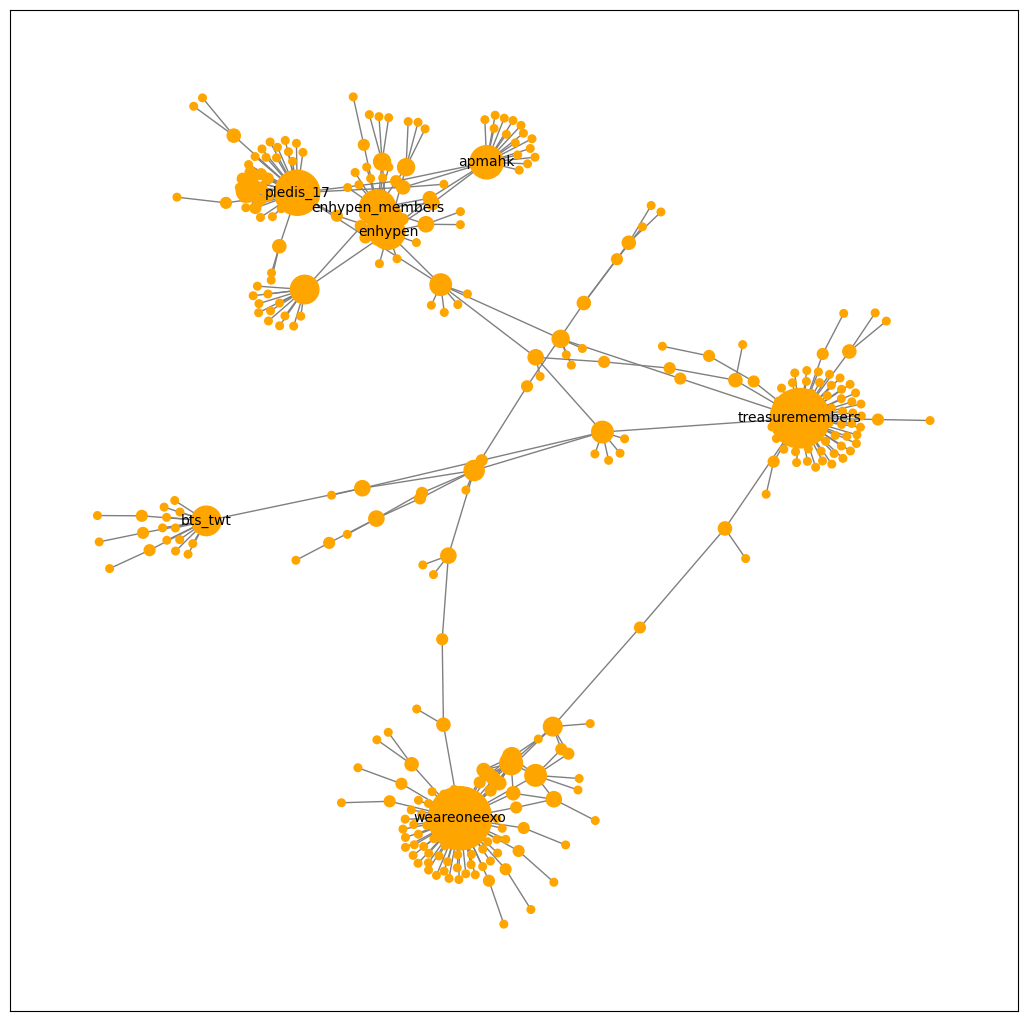

In [ ]:
def filtered_connected_graph(G, min_com):
    centers = {}
    communities = {}
    G_main = G.copy()
    min_nb = min_com

    communities_generator = nx.algorithms.community.girvan_newman(G_main)
    top_level_communities = next(communities_generator)

    filter_com = [c for c in top_level_communities if len(c) > min_com]

    G_main = G_main.copy()

    nodes_to_remove = set(G_main.nodes) - set(node for community in filter_com for node in community)
    G_main.remove_nodes_from(nodes_to_remove)

    for i, community in enumerate(filter_com):
        subgraph = G_main.subgraph(community)
        center_node = max(subgraph.degree, key=lambda x: x[1])[0]
        centers[i] = center_node
        communities[i] = community

    degree = dict(G_main.degree())
    top_nodes = sorted(degree, key=degree.get, reverse=True)[:7]

    plt.figure(figsize=(13, 13))
    nx.draw_networkx(
        G_main,
        with_labels=True,
        labels={node: node if node in top_nodes else "" for node in G_main.nodes()},
        node_color='orange',
        edge_color='grey',
        linewidths=1,
        font_size=10,
        node_size=[v * 30 for v in dict(G_main.degree()).values()],
        pos=nx.fruchterman_reingold_layout(G_main)
    )

    plt.show()
    return G_main

G_main = filtered_connected_graph(G, 10)

In [ ]:
print(str(G_main))

Graph with 325 nodes and 371 edges


### Running Girvan-Newman Algorithm

In [ ]:
def girvan_newman(G):
    def most_valuable_edge(graph):
        centrality = nx.edge_betweenness_centrality(graph, weight='weight')
        return max(centrality, key=centrality.get)

    def without_most_central_edges(graph, most_valuable_edge_func):
        original_num_components = nx.number_connected_components(graph)
        num_new_components = original_num_components

        while num_new_components <= original_num_components:
            edge = most_valuable_edge_func(graph)
            graph.remove_edge(*edge)
            new_components = tuple(nx.connected_components(graph))
            num_new_components = len(new_components)
        return new_components

    if G.number_of_edges() == 0:
        return tuple(nx.connected_components(G))

    g = G.copy().to_undirected()
    g.remove_edges_from(nx.selfloop_edges(g))

    community = []
    modularities = []

    i = 0
    while g.number_of_edges() > 0:
        communities = without_most_central_edges(g, most_valuable_edge)
        modularity = nx.algorithms.community.modularity(G, communities)
        community.append(communities)
        modularities.append(modularity)

        print(f"Count of Community: {len(communities)}, Modularity: {modularity}")

        i += 1
        if len(modularities) > 10 and all(modularities[-i] < modularities[-10] for i in range(2, 10)):
            break

    return community, modularities

community, modularity = girvan_newman(G_main)

Count of Community: 2, Modularity: 0.47308214848773256
Count of Community: 3, Modularity: 0.6458940286687833
Count of Community: 4, Modularity: 0.6849158317652444
Count of Community: 5, Modularity: 0.7545607776752568
Count of Community: 6, Modularity: 0.7645795947428455
Count of Community: 7, Modularity: 0.7711256093751135
Count of Community: 8, Modularity: 0.7730981320972676
Count of Community: 9, Modularity: 0.7770141164333303
Count of Community: 10, Modularity: 0.7876795431593784
Count of Community: 11, Modularity: 0.7921113621667962
Count of Community: 12, Modularity: 0.7926853190546422
Count of Community: 13, Modularity: 0.7922966267318605
Count of Community: 14, Modularity: 0.791817118445812
Count of Community: 15, Modularity: 0.7910506317158406
Count of Community: 16, Modularity: 0.7902514512390931
Count of Community: 17, Modularity: 0.7894195770155696
Count of Community: 18, Modularity: 0.7885550090452702
Count of Community: 19, Modularity: 0.7876577473281946
Count of Community

### Visualize Differential Value of Modularity

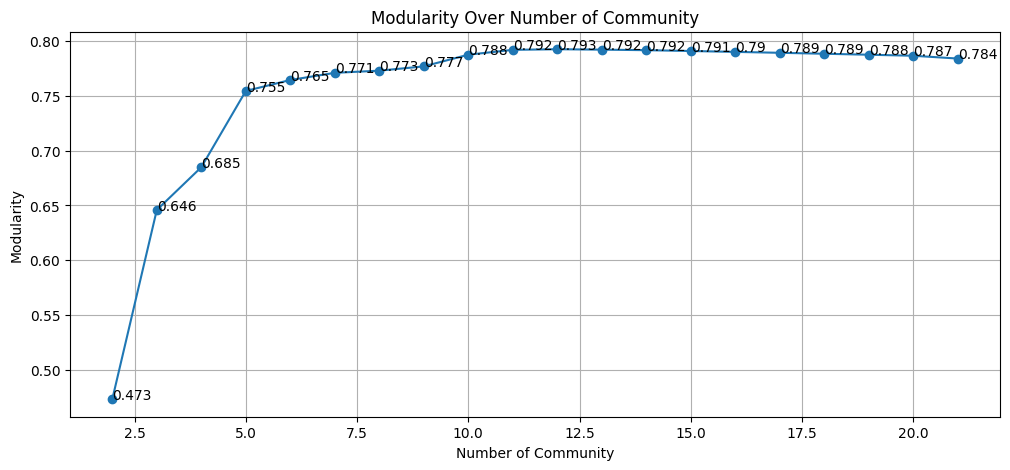

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(range(2, len(modularity) + 2), modularity, marker='o')
for i, txt in enumerate(modularity):
    plt.annotate(round(txt, 3), (i+2, modularity[i]))
plt.xlabel("Number of Community")
plt.ylabel("Modularity")
plt.title("Modularity Over Number of Community")
plt.grid()
plt.show()

### Visualize Final Graph

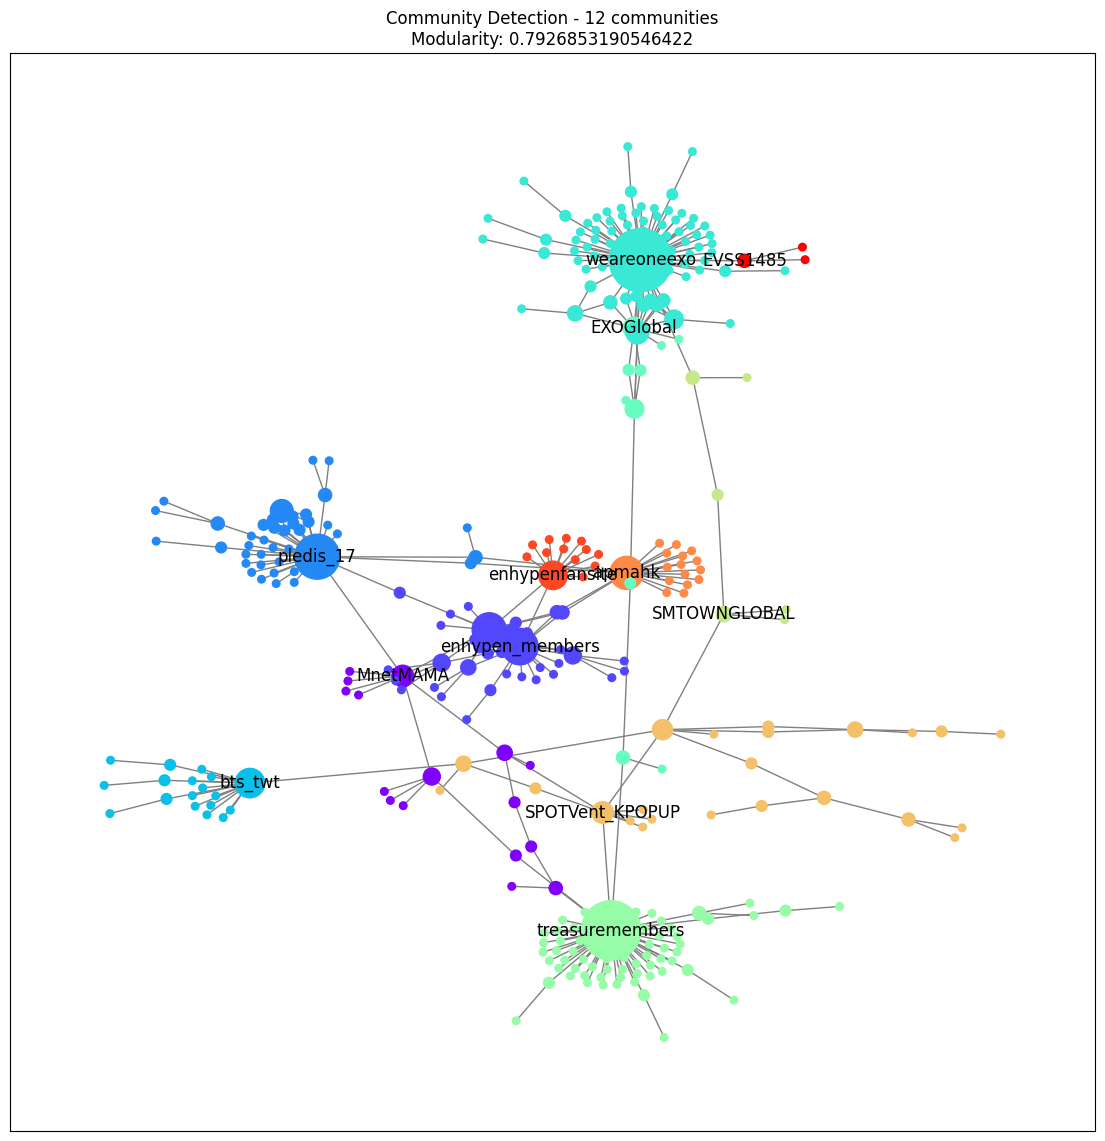

In [ ]:
def visualize_gn(G, target_com):
    communities_generator = nx.algorithms.community.centrality.girvan_newman(G)

    target_num_communities = target_com

    node_groups = []
    color_map = []
    centers = {}
    labels = {}

    for i in range(target_num_communities):
        next(communities_generator)

    for com in next(communities_generator):
        node_groups.append(list(com))

    for node in G:
        for i in range(len(node_groups)):
            if node in node_groups[i]:
                color_map.append(i)

    for i, com in enumerate(node_groups):
        center = max(com, key=G.degree)
        centers[center] = node_groups[i]
        labels[center] = center

    plt.figure(figsize=(14, 14))
    nx.draw_networkx(
        G,
        labels=labels,
        with_labels=True,
        node_color=color_map,
        cmap=plt.cm.rainbow,
        edge_color='grey',
        linewidths=1,
        font_size=12,
        node_size=[v * 30 for v in dict(G.degree()).values()],
        pos=nx.fruchterman_reingold_layout(G)
    )

    plt.title(f"Community Detection - {len(node_groups)} communities\nModularity: {nx.algorithms.community.modularity(G, node_groups)}")
    plt.show()

    return centers

max_index_mod = modularity.index(max(modularity))
centers = visualize_gn(G_main, max_index_mod)

In [ ]:
pd.DataFrame({
    'Center': list(centers.keys()),
    'Community': list(centers.values())
})

,Center,Community
0,MnetMAMA,"[meowulf_, ygtreasuremaker!, bts_bighit, le_ss..."
1,enhypen_members,"[ikeudumplings, _4thGenHotIcon, 1ce1208, param..."
2,pledis_17,"[menjunfei, synergyforsvt, everlastksy_96, car..."
3,bts_twt,"[ARMYTEAMIID, BTSonShazam, omarapollo, /usher,..."
4,weareoneexo,"[EXOLAceTeamPH, HeavenlyBaekSoo, XEXOLParallel..."
5,EXOGlobal,"[weareoneexo…, spotify, kchartsmaster, spotify..."
6,treasuremembers,"[SOJUNGHWANINTL, ForUtrsr, beaupjw, jaftertast..."
7,SMTOWNGLOBAL,"[exolyoutubeteam, minchurr_, hayatesamadayo, g..."
8,SPOTVent_KPOPUP,"[bts_twt', nctyzenbase_, enhypen's, LeRiwo, 12..."
9,apmahk,"[yangwonst, EXOmyKINGS9_, exolnumber1485, jake..."
